In [26]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops 
ops.reset_default_graph()

In [27]:
sess = tf.Session()

[  0.           0.1010101    0.2020202    0.3030303    0.4040404
   0.50505051   0.60606061   0.70707071   0.80808081   0.90909091
   1.01010101   1.11111111   1.21212121   1.31313131   1.41414141
   1.51515152   1.61616162   1.71717172   1.81818182   1.91919192
   2.02020202   2.12121212   2.22222222   2.32323232   2.42424242
   2.52525253   2.62626263   2.72727273   2.82828283   2.92929293
   3.03030303   3.13131313   3.23232323   3.33333333   3.43434343
   3.53535354   3.63636364   3.73737374   3.83838384   3.93939394
   4.04040404   4.14141414   4.24242424   4.34343434   4.44444444
   4.54545455   4.64646465   4.74747475   4.84848485   4.94949495
   5.05050505   5.15151515   5.25252525   5.35353535   5.45454545
   5.55555556   5.65656566   5.75757576   5.85858586   5.95959596
   6.06060606   6.16161616   6.26262626   6.36363636   6.46464646
   6.56565657   6.66666667   6.76767677   6.86868687   6.96969697
   7.07070707   7.17171717   7.27272727   7.37373737   7.47474747
   7.575757

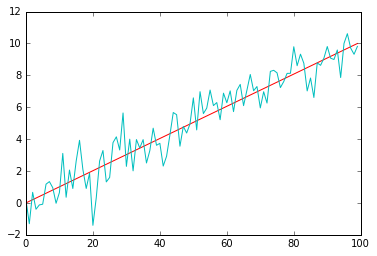

In [41]:
x_vals = np.linspace(0, 10, 100)
print(x_vals)
y_vals = x_vals + np.random.normal(0, 1, 100)
plt.plot(range(100), x_vals, 'r-')
plt.plot(range(100), y_vals, 'c-')
plt.show()

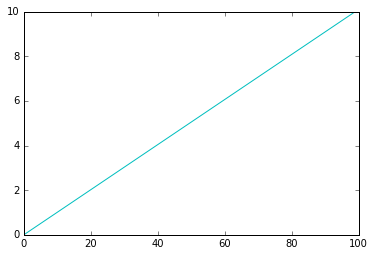

In [51]:
x_vals_column = np.transpose(np.matrix(x_vals))  # 得到一个(100,1)的数组
ones_column = np.transpose(np.repeat(1, 100))
A = np.column_stack((x_vals_column, ones_column))  # A是一个(100,2)
b = np.transpose(np.matrix(y_vals))  # (100, 1)

plt.plot(range(100), x_vals_column, 'c-')
plt.show()
#print(b)

In [40]:
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)
# Matrix inverse solution
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
# print(sess.run(product))
solution = tf.matmul(product, b_tensor)
print(sess.run(solution))

[[ 0.97013018]
 [ 0.12989213]]


In [32]:
solution_eval = sess.run(solution)
# Extract coefficients
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]

In [33]:
print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

# Get best fit line
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

slope: 0.970130182871
y_intercept: 0.129892134979
